# Purpose
1. 請為客戶進行貼標，並依其特性進行命名，以幫助行銷部門推出新產品和制定行銷方式。
2. 請先進行降維後再分群(依你的判斷選擇降維和分群的方法)

# Answer

不確定這份資料來源是哪一種產業，先假設是電商產業。

#### 這個案例比較適合用HIERARCHICAL CLUSTERING，分成四群：
0：都會區中年已婚高階男性主管，收入高，可推廣高單價商品或是提供家庭訂閱方案給這個族群

1：都會區進入職場工作五到十年左右的已婚女性，收入中等，可推廣消耗性高的日常生活用品或美妝保養品給這個族群

2：鄉鎮地區青壯年基層勞工，收入較低，可推廣促銷活動給這個族群

3：都會區衝刺事業的單身男性，收入高，可推廣3C相關商品或時尚精品給這個族群

## 下方是Code

#### ID：顯示客戶的唯一標識。

#### Sex：
0：男性        
1：女性        

#### Marital status：客戶的婚姻狀況。
0：單人        
1：非單身（離婚/分居/已婚/喪偶）        

#### Age：客戶的年齡（以年為單位），計算方法為當年減去創建數據集時客戶的出生年份
18 最小值（數據集中觀察到的最低年齡）        
76 最大值（數據集中觀察到的最高年齡）        

#### Education：客戶的教育水準。
0：其他/未知        
1：高中        
2：大學        
3：研究生院        

#### Income：客戶以美元自我報告的年收入。
35832 最小值（數據集中觀察到的最低收入）        
309364 最大值（數據集中觀察到的最高收入）        

#### Occupation ：客戶的職業類別。
0：失業 / unskilled        
1：skilled employee / official        
2：management / self-employed / highly qualified employee / officer        

#### Settlement size：客戶居住城市的規模。
0：小城市        
1：中等城市        
2：大城市        

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Standard libraries for data analysis:  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import seaborn as sns # For creating plots
sns.set_style('darkgrid')

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#sklearn modules for Model Evaluation & Improvement:   
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score

#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()

import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Standard libraries for data analysis:  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

import seaborn as sns # For creating plots
sns.set_style('darkgrid')
#Miscellaneous Utilitiy Libraries:
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering



# 1. import data

In [3]:
df = pd.read_csv('segmentation_data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
df.describe().round(2).reset_index(level=0)

,index,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,count,2.000000e+03,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00
1,mean,1.000010e+08,0.46,0.5,35.91,1.04,120954.42,0.81,0.74
2,std,5.774900e+02,0.50,0.5,11.72,0.60,38108.82,0.64,0.81
3,min,1.000000e+08,0.00,0.0,18.00,0.00,35832.00,0.00,0.00
4,25%,1.000005e+08,0.00,0.0,27.00,1.00,97663.25,0.00,0.00
5,50%,1.000010e+08,0.00,0.0,33.00,1.00,115548.50,1.00,1.00
6,75%,1.000015e+08,1.00,1.0,42.00,1.00,138072.25,1.00,1.00
7,max,1.000020e+08,1.00,1.0,76.00,3.00,309364.00,2.00,2.00


In [6]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [19]:
df_cat = df.iloc[:,[1,2,4,6,7]];
df_cat.apply(lambda x: x.value_counts(), axis = 0).T



# 0：男性
# 1：女性

# 0：單身
# 1：非單身

# 0：其他/未知
# 1：高中
# 2：大學
# 3：研究生院

# 0：失業 / unskilled
# 1：skilled employee / official
# 2：management / self-employed / highly qualified employee / officer

# 0：小城市
# 1：中等城市
# 2：大城市


,0,1,2,3
Sex,1086.0,914.0,NaN,NaN
Marital status,1007.0,993.0,NaN,NaN
Education,287.0,1386.0,291.0,36.0
Occupation,633.0,1113.0,254.0,NaN
Settlement size,989.0,544.0,467.0,NaN


In [10]:
df['Occupation'] = df['Occupation'].astype(object)

In [11]:
# 降維和分群沒有y
# 將ID以外的 11 個特徵全取出
X = df.iloc[:, 1:] 

# 使用 scikit-learn 內建的 API 標準化
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)

In [12]:
df.iloc[:, 1:] = Z_sk
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,100000002,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,100000003,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,100000004,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,100000005,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


<Axes: >

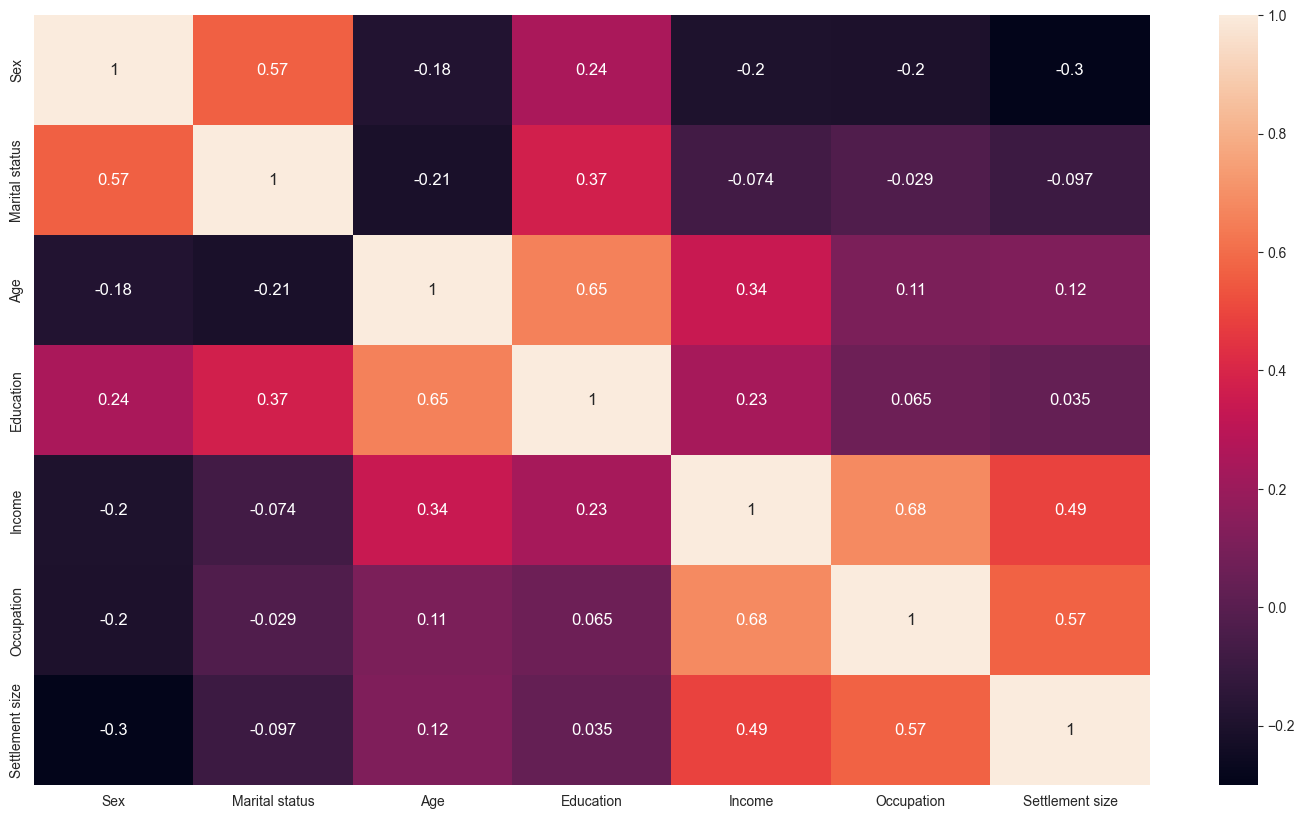

In [13]:
data=df.drop(['ID'],axis=1)
corrmat=data.corr()
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12})

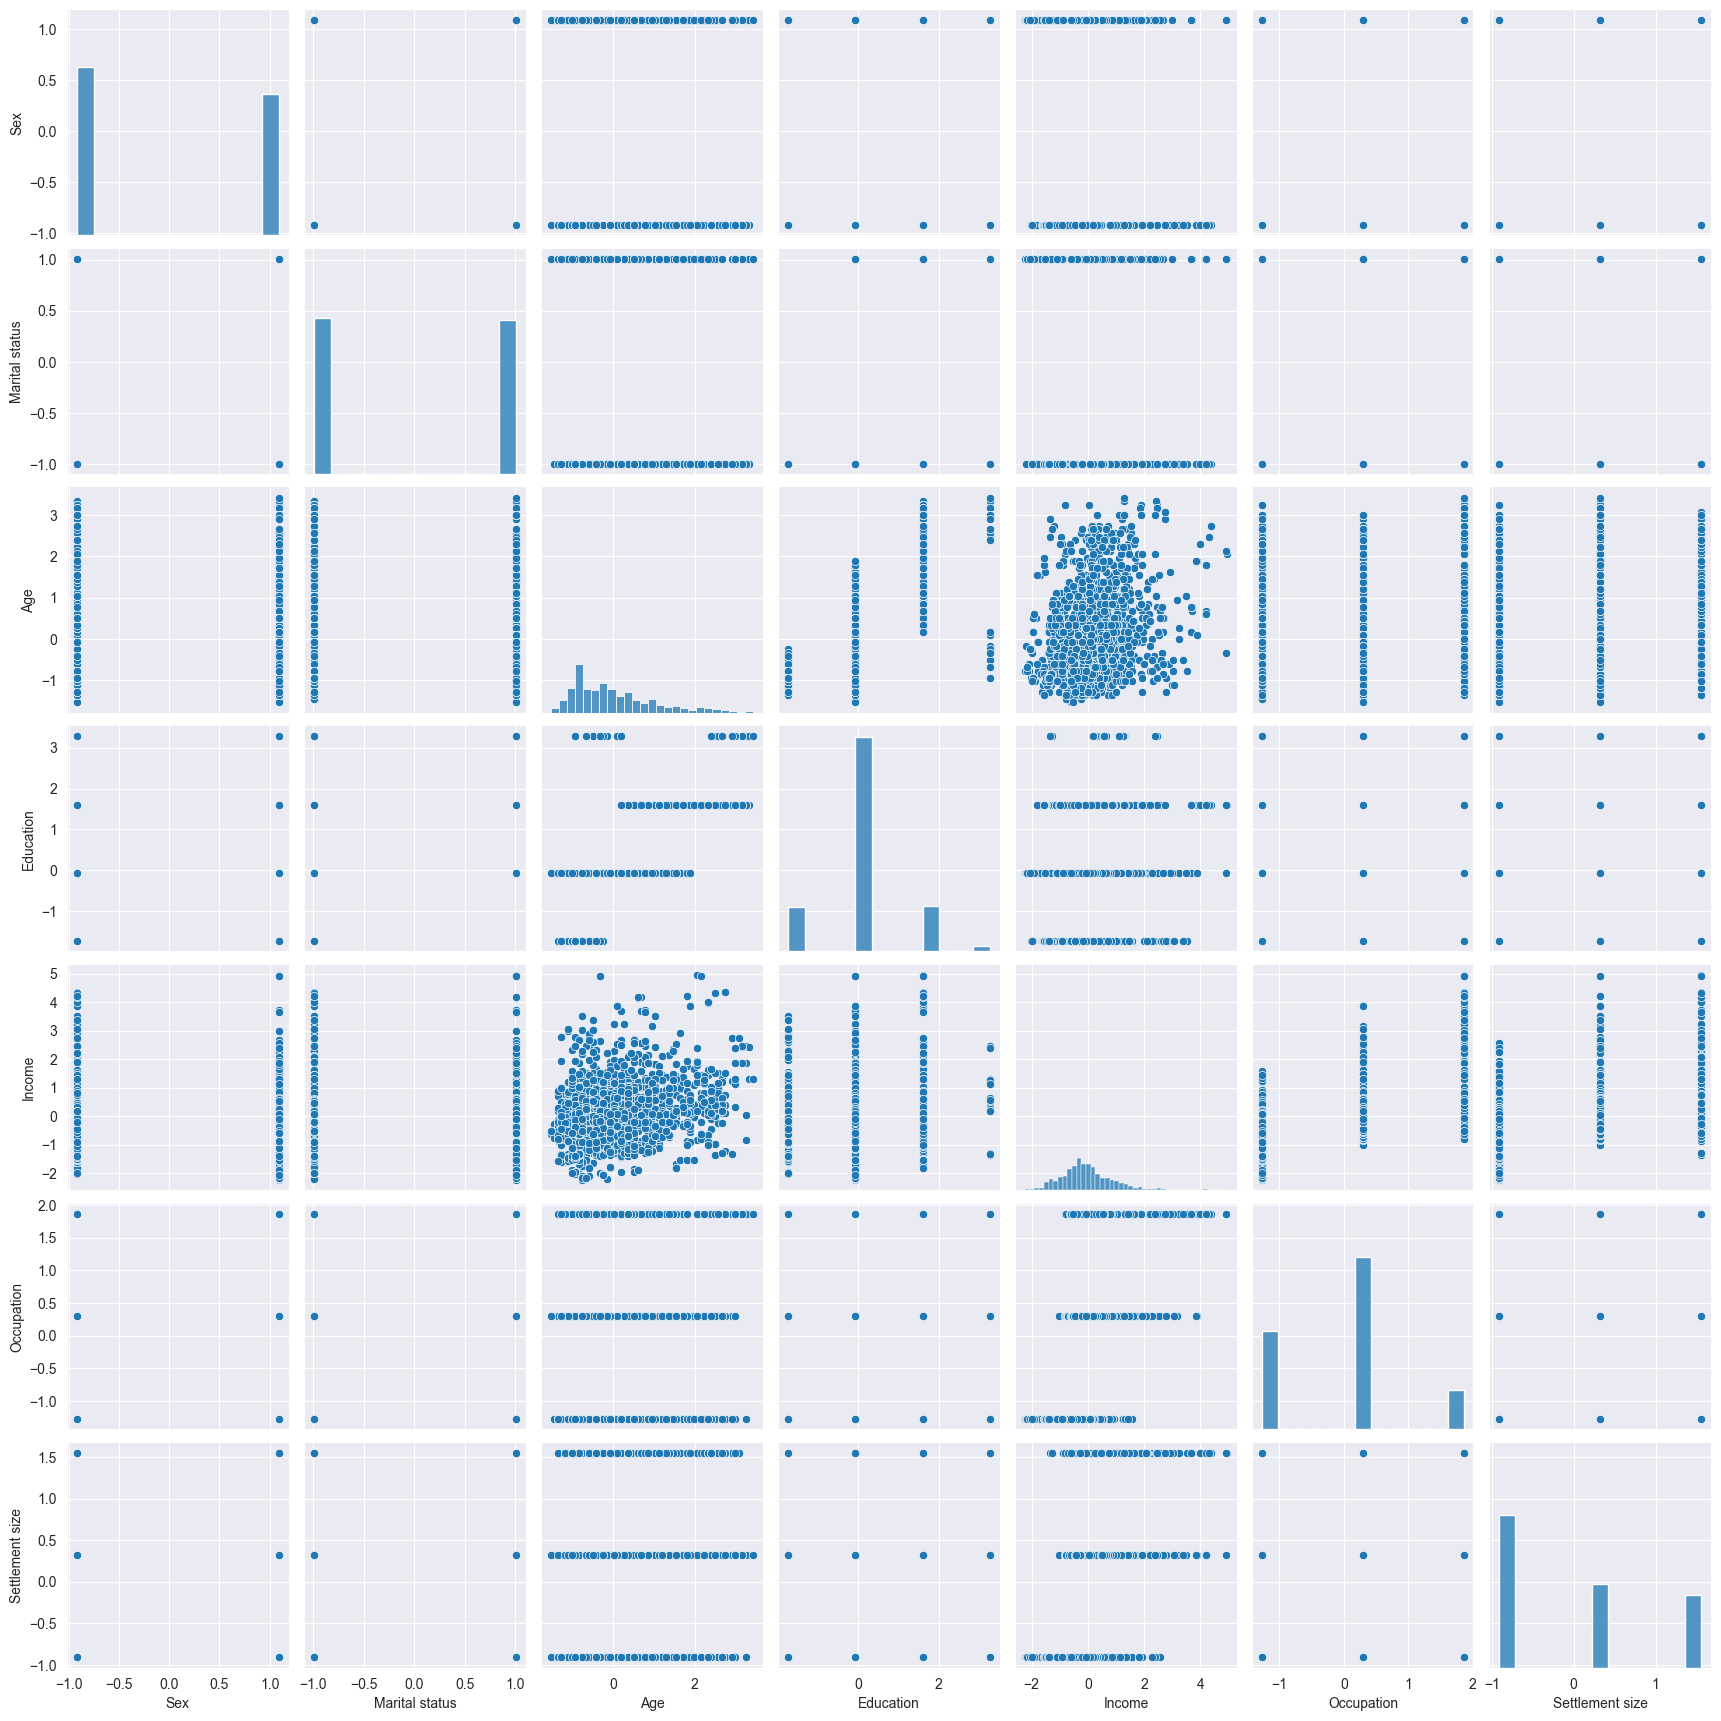

In [14]:
df = df.drop(['ID'],axis=1)
sns.pairplot(df)

In [133]:
df = pd.read_csv('segmentation_data.csv')
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [134]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [137]:
data = pd.DataFrame(df, columns = ['Age','Sex','Marital status','Education', 'Income','Occupation', 'Settlement size'])
data.head()

,Age,Sex,Marital status,Education,Income,Occupation,Settlement size
0,67,0,0,2,124670,1,2
1,22,1,1,1,150773,1,2
2,49,0,0,1,89210,0,0
3,45,0,0,1,171565,1,1
4,53,0,0,1,149031,1,1


In [138]:
# Standarisation technique for scaling
scaler = StandardScaler()
scaled = scaler.fit_transform(data)
data_scaled=pd.DataFrame(scaled,columns=data.columns)

# HIERARCHICAL CLUSTERING

In [139]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

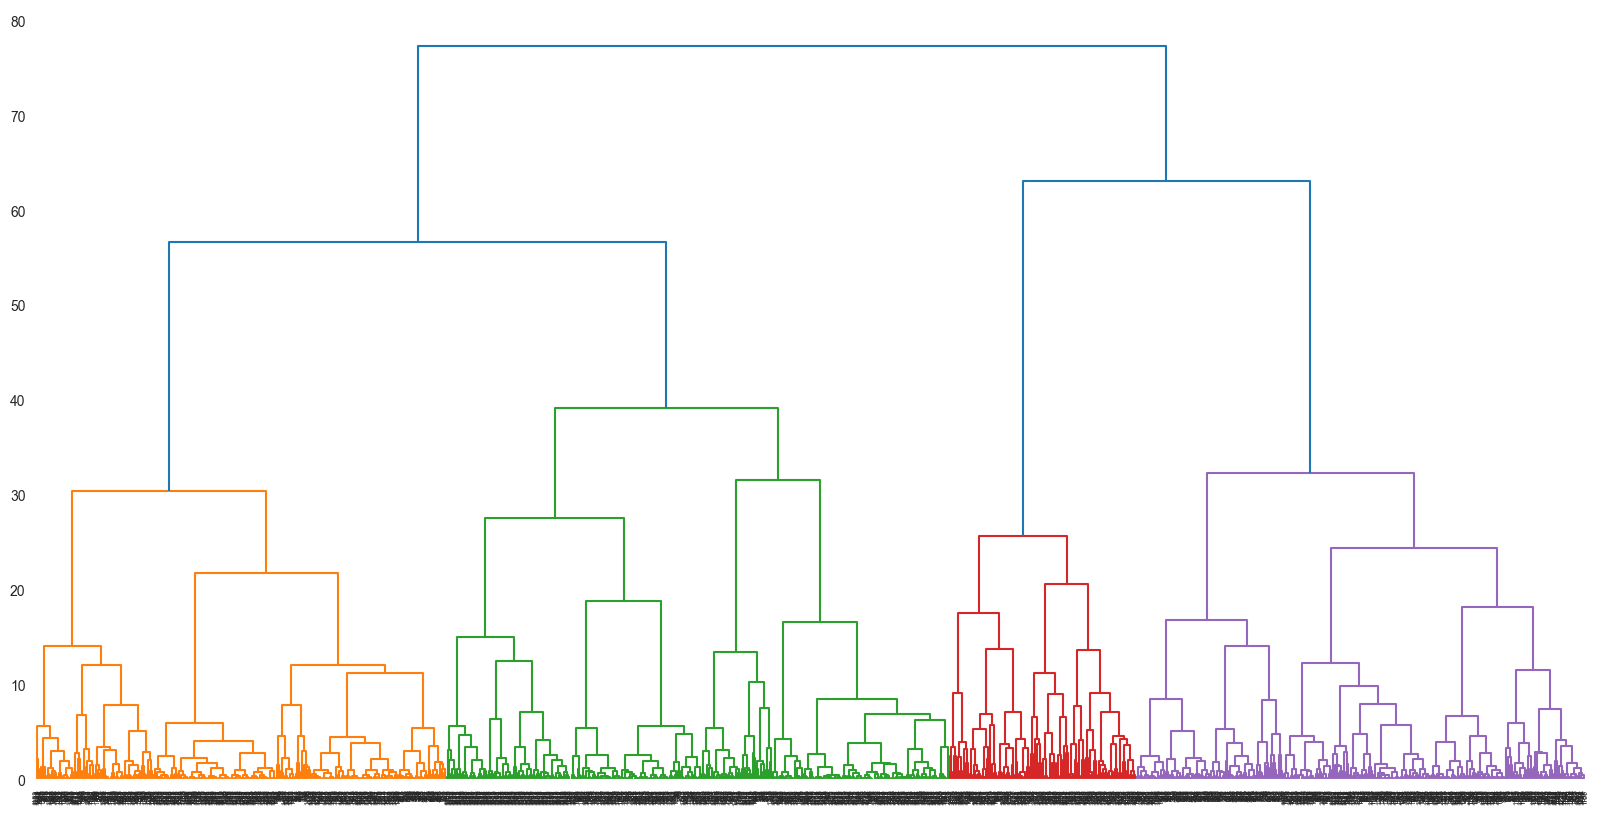

In [140]:
plt.figure(figsize = (20,10))
mergings = linkage(data_scaled, method='ward', metric='euclidean')
dendrogram(mergings)
plt.show()

In [141]:
h_cluster = cut_tree(mergings, n_clusters=4).reshape(-1, )

In [142]:
pred = pd.DataFrame(h_cluster, columns=['h_cluster'])
hierarchy_result = pd.concat([data.reset_index(drop=True), pred], axis=1)
hierarchy_result

,Age,Sex,Marital status,Education,Income,Occupation,Settlement size,h_cluster
0,67,0,0,2,124670,1,2,0
1,22,1,1,1,150773,1,2,1
2,49,0,0,1,89210,0,0,2
3,45,0,0,1,171565,1,1,3
4,53,0,0,1,149031,1,1,3
...,...,...,...,...,...,...,...,...
1995,47,1,0,1,123525,0,0,2
1996,27,1,1,1,117744,1,0,1
1997,31,0,0,0,86400,0,0,2
1998,24,1,1,1,97968,0,0,2


In [143]:
pred.value_counts()

h_cluster
2            649
3            579
1            531
0            241
Name: count, dtype: int64

In [144]:
hierarchy_result.groupby(['h_cluster'], as_index=True).mean()

,Age,Sex,Marital status,Education,Income,Occupation,Settlement size
h_cluster,,,,,,,
0,54.593361,0.497925,0.717842,2.120332,163924.684647,1.257261,1.219917
1,28.062147,0.711864,1.000000,1.000000,120399.591337,1.075330,0.843691
2,34.583975,0.640986,0.445300,0.992296,90807.328197,0.101695,0.023112
3,36.813472,0.000000,0.000000,0.673575,137369.343696,1.176166,1.245250


In [ ]:
#0：中老年，有家庭男性，教育程度偏高，工作職位中等，收入篇高，住在大城市
#1：青少年，有家庭女性，教育程度中等，工作職位中等，收入中等，不住大城市
#2：青壯年，單身女性/男性，教育程度中等，工作職位偏低，收入偏低，不住大城市
#3：青壯年，單身男性，教育程度較低，工作職位中等，收入中等，住在大城市

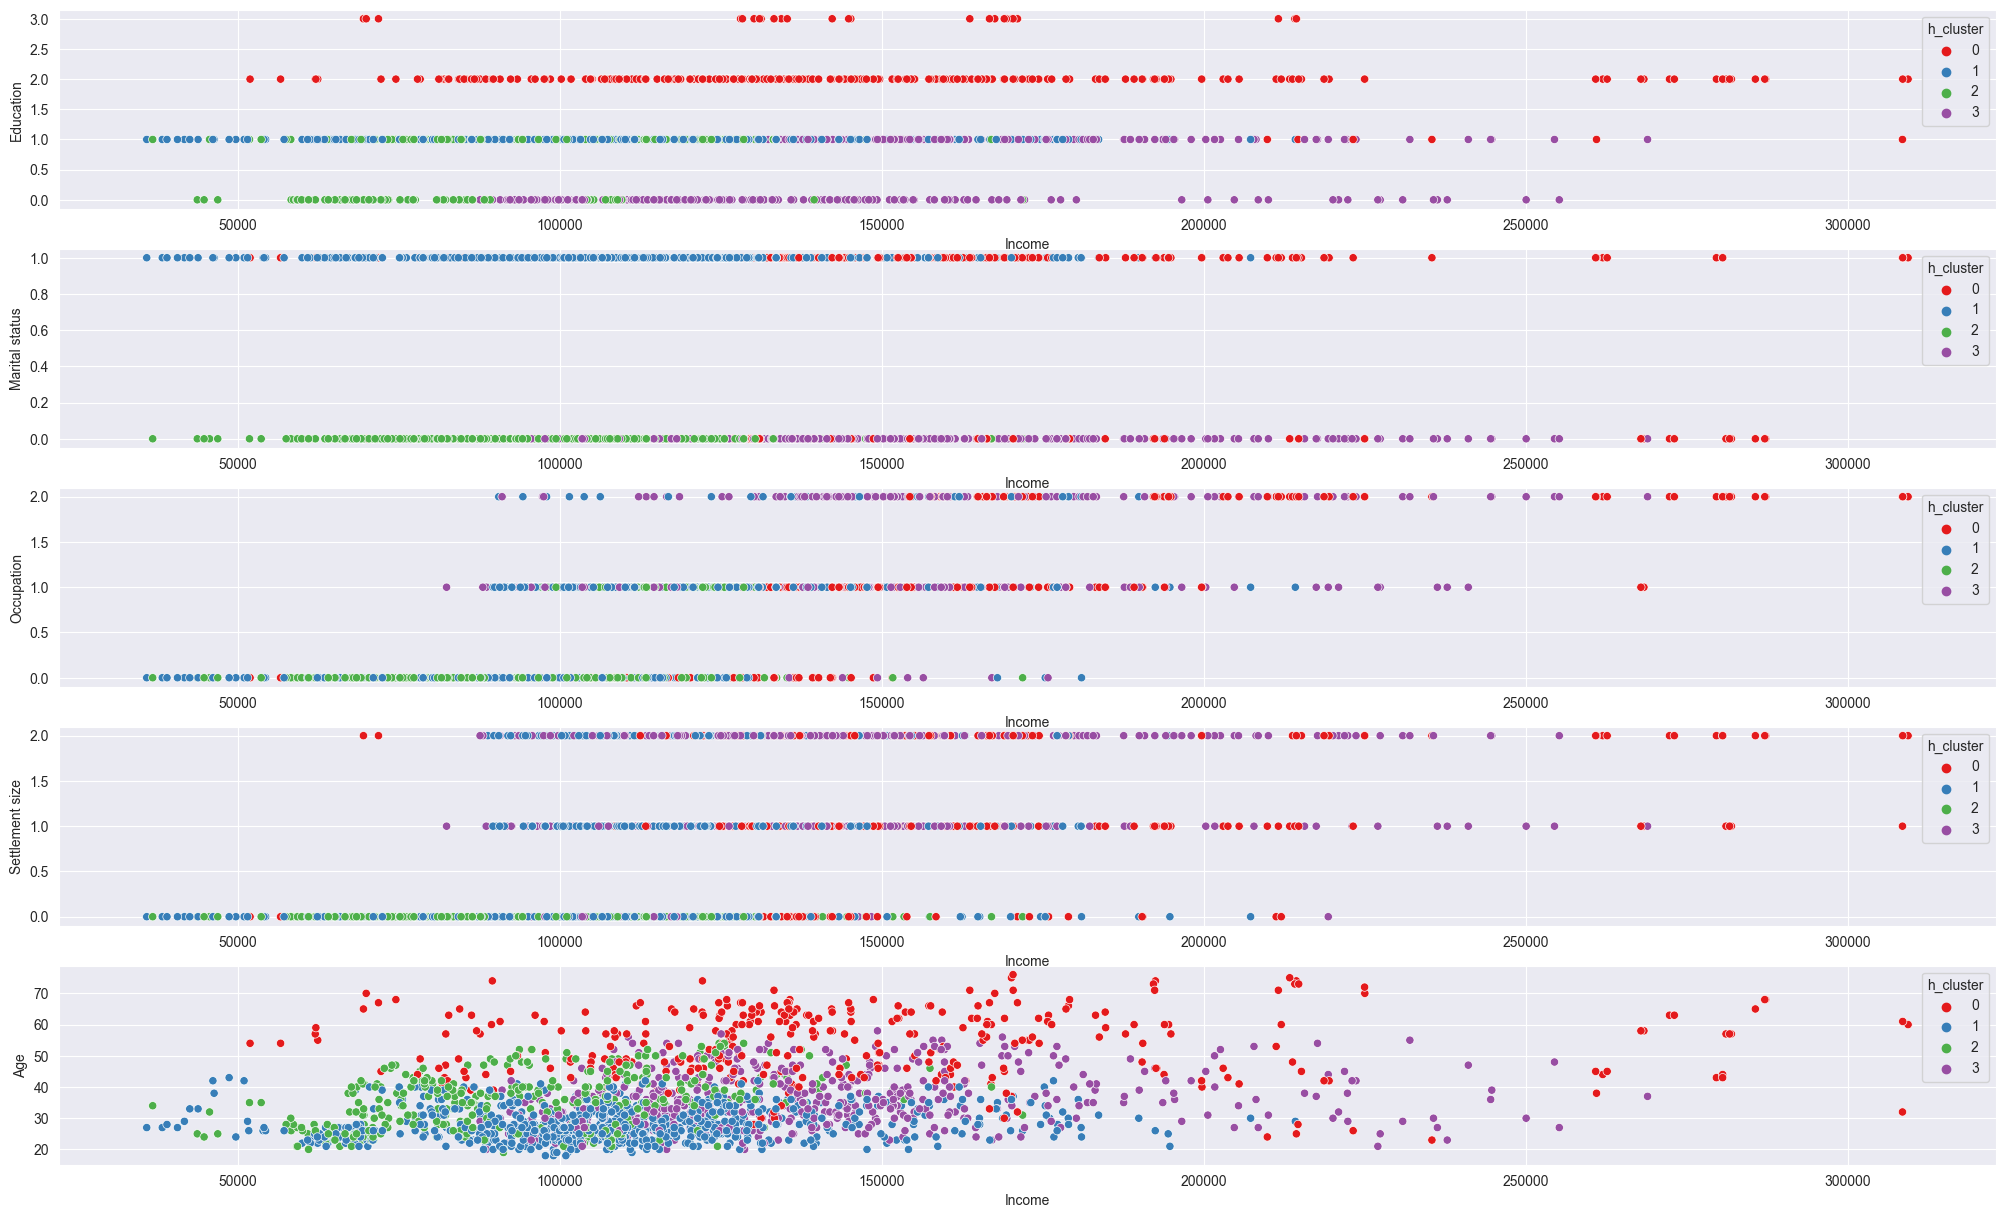

In [48]:
# Scatter plot on Original attributes to visualize the spread of the data
plt.figure(figsize = (25,15))
plt.subplot(5,1,1)
sns.scatterplot(x = 'Income', y = 'Education', hue='h_cluster',
                data = hierarchy_result, legend='full', palette="Set1")
plt.subplot(5,1,2)
sns.scatterplot(x = 'Income', y = 'Marital status', hue='h_cluster', 
                data = hierarchy_result, legend='full', palette="Set1")
plt.subplot(5,1,3)
sns.scatterplot(x = 'Income', y = 'Occupation', hue='h_cluster', 
                data = hierarchy_result, legend='full', palette="Set1")
plt.subplot(5,1,4)
sns.scatterplot(x = 'Income', y = 'Settlement size', hue='h_cluster', 
                data = hierarchy_result, legend='full', palette="Set1")
plt.subplot(5,1,5)
sns.scatterplot(x = 'Income', y = 'Age', hue='h_cluster', 
                data = hierarchy_result, legend='full', palette="Set1")

plt.show()